In [8]:
## Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
from operator import itemgetter
import ast
from ast import literal_eval
import plotly.graph_objs as go
plt.rcParams['axes.facecolor'] = 'grey'

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


In [9]:
usaNationalParks = pd.read_csv('AllTrailsUsaNationalParks.csv')
usaNationalParks.head(3)

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i


In [10]:
usaNationalParks.info()
usaNationalParks.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trail_id           3313 non-null   int64  
 1   name               3313 non-null   object 
 2   area_name          3313 non-null   object 
 3   city_name          3313 non-null   object 
 4   state_name         3313 non-null   object 
 5   country_name       3313 non-null   object 
 6   _geoloc            3313 non-null   object 
 7   popularity         3313 non-null   float64
 8   length             3313 non-null   float64
 9   elevation_gain     3313 non-null   float64
 10  difficulty_rating  3313 non-null   int64  
 11  route_type         3313 non-null   object 
 12  visitor_usage      3060 non-null   float64
 13  avg_rating         3313 non-null   float64
 14  num_reviews        3313 non-null   int64  
 15  features           3313 non-null   object 
 16  activities         3313 

trail_id               0
name                   0
area_name              0
city_name              0
state_name             0
country_name           0
_geoloc                0
popularity             0
length                 0
elevation_gain         0
difficulty_rating      0
route_type             0
visitor_usage        253
avg_rating             0
num_reviews            0
features               0
activities             0
units                  0
dtype: int64

In [11]:
# deleting trail_id, city_name, country_name, popularity, visitor_usage, units
# length and elevation_gain are in m regarless of what the unit column says
usaNationalParks = usaNationalParks.drop(usaNationalParks.columns[[0, 3, 5, 7, 12, 17]], axis=1)
usaNationalParks.head(3)

,name,area_name,state_name,_geoloc,length,elevation_gain,difficulty_rating,route_type,avg_rating,num_reviews,features,activities
0,Harding Ice Field Trail,Kenai Fjords National Park,Alaska,"{'lat': 60.18852, 'lng': -149.63156}",15610.598,1161.8976,5,out and back,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips..."
1,Mount Healy Overlook Trail,Denali National Park,Alaska,"{'lat': 63.73049, 'lng': -148.91968}",6920.162,507.7968,3,out and back,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips..."
2,Exit Glacier Trail,Kenai Fjords National Park,Alaska,"{'lat': 60.18879, 'lng': -149.631}",2896.812,81.9912,1,out and back,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']"


In [12]:
# Split _geoloc to two columns 1) latitude and longtitude
# Create two new columns
usaNationalParks[['lat','lng']] = usaNationalParks['_geoloc'].apply(lambda x: pd.Series(str(x).split(",")))
usaNationalParks['lat'] = usaNationalParks['lat'].apply(lambda x: (x.split(':')[1].split()[-1])).astype(float)
usaNationalParks['lng'] = usaNationalParks['lng'].apply(lambda x: (x.split(':')[1].split()[-1][:-1])).astype(float)
usaNationalParks.drop(['_geoloc'], axis=1, inplace=True)
usaNationalParks.head(3)

,name,area_name,state_name,length,elevation_gain,difficulty_rating,route_type,avg_rating,num_reviews,features,activities,lat,lng
0,Harding Ice Field Trail,Kenai Fjords National Park,Alaska,15610.598,1161.8976,5,out and back,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",60.18852,-149.63156
1,Mount Healy Overlook Trail,Denali National Park,Alaska,6920.162,507.7968,3,out and back,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",63.73049,-148.91968
2,Exit Glacier Trail,Kenai Fjords National Park,Alaska,2896.812,81.9912,1,out and back,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",60.18879,-149.63100


In [13]:
## Split features and activities
usaNationalParks['backpacking'] = usaNationalParks['activities'].apply(lambda x: 'backpacking' in x)
usaNationalParks.drop(['activities'], axis=1, inplace=True)

interesting_features = ['forest', 'lake', 'river', 'cave', 'waterfall', 'beach', 'hot-springs', 'historic-site']
for feature in interesting_features:
    usaNationalParks[feature] = usaNationalParks['features'].apply(lambda x: feature in x)
usaNationalParks.drop(['features'], axis=1, inplace=True)

usaNationalParks.head(3)

,name,area_name,state_name,length,elevation_gain,difficulty_rating,route_type,avg_rating,num_reviews,lat,lng,backpacking,forest,lake,river,cave,waterfall,beach,hot-springs,historic-site
0,Harding Ice Field Trail,Kenai Fjords National Park,Alaska,15610.598,1161.8976,5,out and back,5.0,423,60.18852,-149.63156,False,True,False,True,False,True,False,False,False
1,Mount Healy Overlook Trail,Denali National Park,Alaska,6920.162,507.7968,3,out and back,4.5,260,63.73049,-148.91968,False,True,False,False,False,False,False,False,False
2,Exit Glacier Trail,Kenai Fjords National Park,Alaska,2896.812,81.9912,1,out and back,4.5,224,60.18879,-149.63100,False,False,False,False,False,False,False,False,False


In [14]:
Total_count = usaNationalParks[['avg_rating', 'num_reviews']].groupby(['num_reviews']).count().reset_index()
Total_count
# 116 trails have a rating but no reviews? Lets take a look...

,num_reviews,avg_rating
0,0,116
1,1,185
2,2,170
3,3,132
4,4,133
...,...,...
382,2122,1
383,2278,1
384,2332,1
385,2991,1


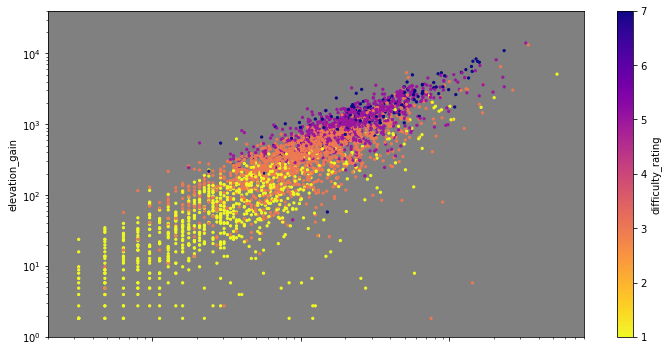

In [15]:
usaNationalParks.plot.scatter(x ='length',
                              y='elevation_gain',
                              c='difficulty_rating',
                              loglog=True,
                              xlim=[200, 800000],
                              ylim=[1, 40000],
                              colormap='plasma_r',
                              figsize=(12,6),
                              s=5)
plt.show()

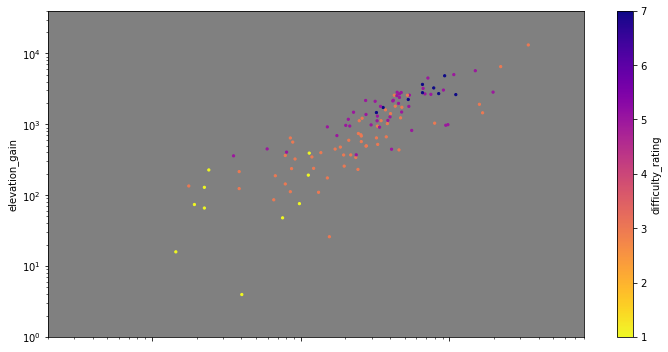

In [16]:
zeroReviews = usaNationalParks[usaNationalParks['num_reviews'] == 0]
zeroReviews.plot.scatter(x ='length',
                         y='elevation_gain',
                         c='difficulty_rating',
                         loglog=True,
                         xlim=[200, 800000],
                         ylim=[1, 40000],
                         colormap='plasma_r',
                         figsize=(12,6),
                         s=5)
plt.show()
# These trails look normal enough. No need to remove them, and no need for the num_reviews col anymore.
usaNationalParks.drop(['num_reviews'], axis=1, inplace=True)

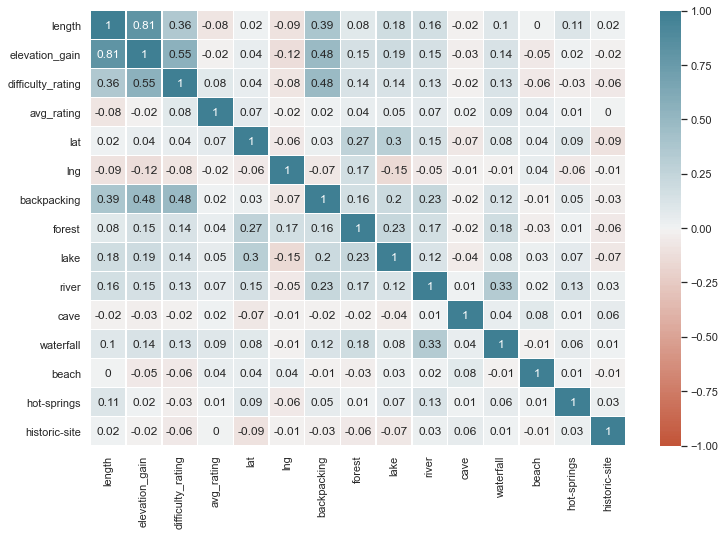

In [17]:
corr = usaNationalParks.corr().round(2)
sns.set(rc={"figure.figsize":(12,8)})
heatmap = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap=sns.diverging_palette(20, 220, n=200),linewidths=.5)
plt.show()

In [18]:
'''
1 -> easy
3 -> moderate
5 -> hard
7 -> very hard
'''
def difficulty_rating_map(difficulty_rating):
    if difficulty_rating == 1:
        return 'easy'
    elif difficulty_rating == 3:
        return 'moderate'
    elif difficulty_rating == 5:
        return 'hard'
    elif difficulty_rating == 7:
        return 'very hard'
    else:
        return 'error'

In [19]:
#New difficulty rating definition, reordering, adding is_jamie col
usaNationalParks['difficulty_rating'] = usaNationalParks.apply(lambda x: difficulty_rating_map(x['difficulty_rating']), axis = 1)
usaNationalParks = usaNationalParks.iloc[:, [0,1,2,3,4,6,8,9,11,12,13,15,16,18,14,17,10,5,7]]
usaNationalParks['is_jamie']=0
usaNationalParks.head(3)

,name,area_name,state_name,length,elevation_gain,route_type,lat,lng,forest,lake,river,waterfall,beach,historic-site,cave,hot-springs,backpacking,difficulty_rating,avg_rating,is_jamie
0,Harding Ice Field Trail,Kenai Fjords National Park,Alaska,15610.598,1161.8976,out and back,60.18852,-149.63156,True,False,True,True,False,False,False,False,False,hard,5.0,0
1,Mount Healy Overlook Trail,Denali National Park,Alaska,6920.162,507.7968,out and back,63.73049,-148.91968,True,False,False,False,False,False,False,False,False,moderate,4.5,0
2,Exit Glacier Trail,Kenai Fjords National Park,Alaska,2896.812,81.9912,out and back,60.18879,-149.63100,False,False,False,False,False,False,False,False,False,easy,4.5,0


In [20]:
usaNationalParks.mean(axis=0)

length            17676.848717
elevation_gain      641.805943
lat                  39.671520
lng                -106.388170
forest                0.606399
lake                  0.249019
river                 0.291880
waterfall             0.167824
beach                 0.038032
historic-site         0.029580
cave                  0.022034
hot-springs           0.027468
backpacking           0.259885
avg_rating            4.173106
is_jamie              0.000000
dtype: float64

In [21]:
X = usaNationalParks.drop('name', axis=1).drop('area_name', axis=1).drop('state_name', axis=1)
#Merging AllTrails data with my personal data
jamieHikesCompleted = pd.read_csv('JamieHikesCompleted.csv', encoding='utf-8-sig')
trails = pd.concat([X, jamieHikesCompleted])
y_rating = trails.loc[:, 'avg_rating']
y_difficulty = trails.loc[:, 'difficulty_rating']
trails = trails.drop('avg_rating', axis=1).drop('difficulty_rating', axis=1)

one_hot = OneHotEncoder()
transformer_route_type = ColumnTransformer([('one_hot', one_hot, ['route_type'])], remainder='passthrough')
trails = transformer_route_type.fit_transform(trails)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(trails, y_difficulty, test_size=0.2)
grid = {"n_estimators": [100, 200, 500, 1000],
        "max_depth": [5, 10, 20, 30],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

model = RandomForestClassifier()
model = RandomizedSearchCV(estimator=model, param_distributions=grid, n_iter=144, cv=5, verbose=10)
model.fit(X_train, y_train)
print(model.best_params_)
print(model.score(X_test, y_test))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 1/144] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.648 total time=   0.3s
[CV 2/5; 1/144] START max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 1/144] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.647 total time=   0.3s
[CV 3/5; 1/144] START max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 1/144] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.650 total time=   0.3s
[CV 4/5; 1/144] START max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 1/144] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.620 total time=   0.3s
[CV 5/5; 1/144] START max_depth=5, min_samples_leaf=1, min_samples_sp

[CV 3/5; 8/144] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=1000;, score=0.647 total time=   2.9s
[CV 4/5; 8/144] START max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=1000
[CV 4/5; 8/144] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=1000;, score=0.629 total time=   4.0s
[CV 5/5; 8/144] START max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=1000
[CV 5/5; 8/144] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=1000;, score=0.685 total time=   2.8s
[CV 1/5; 9/144] START max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100
[CV 1/5; 9/144] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.652 total time=   0.3s
[CV 2/5; 9/144] START max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100
[CV 2/5; 9/144] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.658 total time=   0.3s
[CV

[CV 1/5; 16/144] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=0.658 total time=   2.9s
[CV 2/5; 16/144] START max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 2/5; 16/144] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=0.654 total time=   3.1s
[CV 3/5; 16/144] START max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 3/5; 16/144] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=0.648 total time=   2.8s
[CV 4/5; 16/144] START max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 4/5; 16/144] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=0.633 total time=   2.8s
[CV 5/5; 16/144] START max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 5/5; 16/144] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=0.687 total tim

[CV 4/5; 23/144] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=500;, score=0.627 total time=   1.5s
[CV 5/5; 23/144] START max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=500
[CV 5/5; 23/144] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=500;, score=0.682 total time=   1.4s
[CV 1/5; 24/144] START max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=1000
[CV 1/5; 24/144] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=1000;, score=0.654 total time=   2.8s
[CV 2/5; 24/144] START max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=1000
[CV 2/5; 24/144] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=1000;, score=0.660 total time=   2.8s
[CV 3/5; 24/144] START max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=1000
[CV 3/5; 24/144] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=1000;, score=0.650 total time= 

[CV 2/5; 31/144] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=500;, score=0.648 total time=   1.4s
[CV 3/5; 31/144] START max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=500
[CV 3/5; 31/144] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=500;, score=0.654 total time=   1.6s
[CV 4/5; 31/144] START max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=500
[CV 4/5; 31/144] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=500;, score=0.627 total time=   1.5s
[CV 5/5; 31/144] START max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=500
[CV 5/5; 31/144] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=500;, score=0.693 total time=   1.4s
[CV 1/5; 32/144] START max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=1000
[CV 1/5; 32/144] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=1000;, score=0.650 total time=   2.

[CV 5/5; 38/144] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.687 total time=   0.7s
[CV 1/5; 39/144] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 1/5; 39/144] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.671 total time=   1.8s
[CV 2/5; 39/144] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 2/5; 39/144] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.648 total time=   1.9s
[CV 3/5; 39/144] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 3/5; 39/144] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.669 total time=   2.0s
[CV 4/5; 39/144] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 4/5; 39/144] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.642 total tim

[CV 2/5; 46/144] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.654 total time=   0.7s
[CV 3/5; 46/144] START max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 3/5; 46/144] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.665 total time=   0.7s
[CV 4/5; 46/144] START max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 4/5; 46/144] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.652 total time=   0.7s
[CV 5/5; 46/144] START max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=200
[CV 5/5; 46/144] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.687 total time=   0.7s
[CV 1/5; 47/144] START max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=500
[CV 1/5; 47/144] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=500;, score=0.684 total tim

[CV 4/5; 53/144] END max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.655 total time=   0.3s
[CV 5/5; 53/144] START max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100
[CV 5/5; 53/144] END max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.691 total time=   0.4s
[CV 1/5; 54/144] START max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=200
[CV 1/5; 54/144] END max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=0.664 total time=   0.9s
[CV 2/5; 54/144] START max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=200
[CV 2/5; 54/144] END max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=0.656 total time=   0.9s
[CV 3/5; 54/144] START max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=200
[CV 3/5; 54/144] END max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=0.662 total tim

[CV 1/5; 61/144] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.667 total time=   0.4s
[CV 2/5; 61/144] START max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 2/5; 61/144] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.652 total time=   0.3s
[CV 3/5; 61/144] START max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 3/5; 61/144] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.658 total time=   0.3s
[CV 4/5; 61/144] START max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 4/5; 61/144] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.650 total time=   0.3s
[CV 5/5; 61/144] START max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 5/5; 61/144] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.691 total tim

[CV 4/5; 68/144] END max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=1000;, score=0.646 total time=   3.8s
[CV 5/5; 68/144] START max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=1000
[CV 5/5; 68/144] END max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=1000;, score=0.689 total time=   3.5s
[CV 1/5; 69/144] START max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=100
[CV 1/5; 69/144] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=100;, score=0.671 total time=   0.4s
[CV 2/5; 69/144] START max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=100
[CV 2/5; 69/144] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=100;, score=0.654 total time=   0.3s
[CV 3/5; 69/144] START max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=100
[CV 3/5; 69/144] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=100;, score=0.660 total 

[CV 2/5; 76/144] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=0.639 total time=   4.2s
[CV 3/5; 76/144] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=1000
[CV 3/5; 76/144] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=0.658 total time=   4.6s
[CV 4/5; 76/144] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=1000
[CV 4/5; 76/144] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=0.650 total time=   4.2s
[CV 5/5; 76/144] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=1000
[CV 5/5; 76/144] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=0.684 total time=   4.2s
[CV 1/5; 77/144] START max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 1/5; 77/144] END max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.675 to

[CV 4/5; 83/144] END max_depth=20, min_samples_leaf=1, min_samples_split=6, n_estimators=500;, score=0.644 total time=   1.9s
[CV 5/5; 83/144] START max_depth=20, min_samples_leaf=1, min_samples_split=6, n_estimators=500
[CV 5/5; 83/144] END max_depth=20, min_samples_leaf=1, min_samples_split=6, n_estimators=500;, score=0.693 total time=   1.9s
[CV 1/5; 84/144] START max_depth=20, min_samples_leaf=1, min_samples_split=6, n_estimators=1000
[CV 1/5; 84/144] END max_depth=20, min_samples_leaf=1, min_samples_split=6, n_estimators=1000;, score=0.667 total time=   4.0s
[CV 2/5; 84/144] START max_depth=20, min_samples_leaf=1, min_samples_split=6, n_estimators=1000
[CV 2/5; 84/144] END max_depth=20, min_samples_leaf=1, min_samples_split=6, n_estimators=1000;, score=0.648 total time=   3.9s
[CV 3/5; 84/144] START max_depth=20, min_samples_leaf=1, min_samples_split=6, n_estimators=1000
[CV 3/5; 84/144] END max_depth=20, min_samples_leaf=1, min_samples_split=6, n_estimators=1000;, score=0.679 tot

[CV 1/5; 91/144] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=500;, score=0.671 total time=   2.2s
[CV 2/5; 91/144] START max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=500
[CV 2/5; 91/144] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=500;, score=0.662 total time=   2.1s
[CV 3/5; 91/144] START max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=500
[CV 3/5; 91/144] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=500;, score=0.673 total time=   1.9s
[CV 4/5; 91/144] START max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=500
[CV 4/5; 91/144] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=500;, score=0.638 total time=   1.9s
[CV 5/5; 91/144] START max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=500
[CV 5/5; 91/144] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=500;, score=0.693 total tim

[CV 3/5; 98/144] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.664 total time=   0.7s
[CV 4/5; 98/144] START max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 4/5; 98/144] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.646 total time=   0.7s
[CV 5/5; 98/144] START max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 5/5; 98/144] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.697 total time=   0.7s
[CV 1/5; 99/144] START max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=500
[CV 1/5; 99/144] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.677 total time=   2.1s
[CV 2/5; 99/144] START max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=500
[CV 2/5; 99/144] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.658 total tim

[CV 5/5; 105/144] END max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=100;, score=0.685 total time=   0.4s
[CV 1/5; 106/144] START max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=200
[CV 1/5; 106/144] END max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=200;, score=0.667 total time=   0.7s
[CV 2/5; 106/144] START max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=200
[CV 2/5; 106/144] END max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=200;, score=0.660 total time=   0.7s
[CV 3/5; 106/144] START max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=200
[CV 3/5; 106/144] END max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=200;, score=0.675 total time=   0.7s
[CV 4/5; 106/144] START max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=200
[CV 4/5; 106/144] END max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=200;, score=0.650 

[CV 2/5; 113/144] END max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.652 total time=   0.5s
[CV 3/5; 113/144] START max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 3/5; 113/144] END max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.677 total time=   0.5s
[CV 4/5; 113/144] START max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 4/5; 113/144] END max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.650 total time=   0.7s
[CV 5/5; 113/144] START max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 5/5; 113/144] END max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.693 total time=   0.4s
[CV 1/5; 114/144] START max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 1/5; 114/144] END max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=0.667 

[CV 4/5; 120/144] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=1000;, score=0.638 total time=   5.8s
[CV 5/5; 120/144] START max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=1000
[CV 5/5; 120/144] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=1000;, score=0.693 total time=  10.7s
[CV 1/5; 121/144] START max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/5; 121/144] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.684 total time=   0.8s
[CV 2/5; 121/144] START max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 2/5; 121/144] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.664 total time=   0.5s
[CV 3/5; 121/144] START max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 3/5; 121/144] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.6

[CV 1/5; 128/144] END max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=1000;, score=0.679 total time=   4.0s
[CV 2/5; 128/144] START max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=1000
[CV 2/5; 128/144] END max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=1000;, score=0.656 total time=   4.1s
[CV 3/5; 128/144] START max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=1000
[CV 3/5; 128/144] END max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=1000;, score=0.677 total time=   3.8s
[CV 4/5; 128/144] START max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=1000
[CV 4/5; 128/144] END max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=1000;, score=0.640 total time=   3.8s
[CV 5/5; 128/144] START max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=1000
[CV 5/5; 128/144] END max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=1000;, sco

[CV 3/5; 135/144] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.673 total time=   1.7s
[CV 4/5; 135/144] START max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=500
[CV 4/5; 135/144] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.644 total time=   1.7s
[CV 5/5; 135/144] START max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=500
[CV 5/5; 135/144] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.687 total time=   1.9s
[CV 1/5; 136/144] START max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=1000
[CV 1/5; 136/144] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=0.673 total time=   3.7s
[CV 2/5; 136/144] START max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=1000
[CV 2/5; 136/144] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=0.

[CV 5/5; 142/144] END max_depth=30, min_samples_leaf=4, min_samples_split=6, n_estimators=200;, score=0.701 total time=   0.7s
[CV 1/5; 143/144] START max_depth=30, min_samples_leaf=4, min_samples_split=6, n_estimators=500
[CV 1/5; 143/144] END max_depth=30, min_samples_leaf=4, min_samples_split=6, n_estimators=500;, score=0.673 total time=   1.8s
[CV 2/5; 143/144] START max_depth=30, min_samples_leaf=4, min_samples_split=6, n_estimators=500
[CV 2/5; 143/144] END max_depth=30, min_samples_leaf=4, min_samples_split=6, n_estimators=500;, score=0.664 total time=   1.9s
[CV 3/5; 143/144] START max_depth=30, min_samples_leaf=4, min_samples_split=6, n_estimators=500
[CV 3/5; 143/144] END max_depth=30, min_samples_leaf=4, min_samples_split=6, n_estimators=500;, score=0.677 total time=   2.2s
[CV 4/5; 143/144] START max_depth=30, min_samples_leaf=4, min_samples_split=6, n_estimators=500
[CV 4/5; 143/144] END max_depth=30, min_samples_leaf=4, min_samples_split=6, n_estimators=500;, score=0.646 

In [23]:
jamieHikesWatchList = pd.read_csv("JamieHikesWatchList.csv", encoding="utf-8-sig")
one_hot_w = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot_w, ['route_type'])], remainder='passthrough')
trails_watchList = transformer.fit_transform(jamieHikesWatchList)

for result in model.predict(trails_watchList):
    print(result)

moderate
moderate
moderate
hard
moderate
hard
moderate
hard
hard
moderate
hard
hard
hard
moderate
moderate
moderate
moderate
hard
moderate
hard
moderate
moderate
moderate
moderate
moderate
easy
hard
hard
hard
hard
moderate
hard
moderate
moderate
hard
hard
hard
moderate
moderate
easy
moderate
easy
easy


In [24]:
jamieHikesCompleted = pd.read_csv('JamieHikesCompleted.csv', encoding='utf-8-sig')
jamieHikesCompleted = jamieHikesCompleted.drop('avg_rating', axis=1).drop('difficulty_rating', axis=1)
one_hot_c = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot_c, ['route_type'])], remainder='passthrough')
trails_completed = transformer.fit_transform(jamieHikesCompleted)

for result in model.predict(trails_completed):
    print(result)

very hard
moderate
hard
hard
hard
moderate
moderate
moderate
moderate
moderate


In [29]:
pp = model.predict_proba(trails_watchList)
print(model.classes_)
for i, row in enumerate(pp): #scale from 0-1
    print(((2*row[1])+(1*row[2])+(3*row[3]))/3)
    
print(pp)

['easy' 'hard' 'moderate' 'very hard']
0.28323575496912645
0.3195073885267641
0.36431896868265584
0.5025593275452801
0.39729408826265145
0.5132330196305047
0.41040403870009134
0.5589208205345075
0.4953583877995644
0.5121307561167088
0.5724938321146186
0.43354092748210404
0.5684545663676099
0.40728722265090983
0.30814708881959946
0.3560209212902968
0.31057962031172853
0.4714024502551591
0.3522673989075609
0.45911658773027497
0.27744752762791175
0.30333292458914224
0.28323575496912645
0.2615552246202658
0.25513855795359913
0.19550384263223564
0.5292902937548303
0.5335102339181287
0.4687211628936736
0.477697353369864
0.5175380650448586
0.5769691083770031
0.49684617180205404
0.4567396382913223
0.5882323441453878
0.5686582700713135
0.5212702249427356
0.39581955783893336
0.3944786422011654
0.17531464043019582
0.37259499536437085
0.17470857982413524
0.2027601118383109
[[0.28154977 0.07309037 0.61627653 0.02908333]
 [0.29777525 0.19513075 0.47651067 0.03058333]
 [0.22062272 0.24490256 0.500136

###### pp = model.predict_proba(trails_completed)
print(model.classes_)
for i, row in enumerate(pp): #scale from 0-1
    print(((2*row[1])+(1*row[2])+(3*row[3]))/3)

In [30]:
jamieHikesCompleted = pd.read_csv('JamieHikesCompleted.csv', encoding='utf-8-sig')
trails = pd.concat([X, jamieHikesCompleted])

y_rating_new = trails.loc[:, 'avg_rating']
X_new = trails.drop('avg_rating', axis=1).drop('difficulty_rating', axis=1)

score = 0
from sklearn.linear_model import Ridge
while score < 0.07:
    X_train, X_test, y_train, y_test = train_test_split(X_new, y_rating_new, test_size=0.2)
    grid = {}

    trails = transformer_route_type.fit_transform(X_new)
    trails_train = transformer_route_type.fit_transform(X_train)
    trails_test = transformer_route_type.fit_transform(X_test)

    regr = Ridge(alpha=1.0)
    regr.fit(trails_train, y_train)
    score = regr.score(trails_test, y_test)
    print(score)


0.04027693188782977
0.03331129423742274
0.02794368164075356
0.01889642799418567
-0.03810506999002805
0.007105101469117914
0.04394490433143039
0.022465034163544395
0.031448259639598186
0.00510067197967512
0.05343069098882758
-0.0091151384587711
-0.019578916346233433
0.008628021502242955
0.014789395022495766
0.014082439926265344
-0.02291544644716592
0.048856273038812015
-0.00025664960539772963
0.0003149673039014589
0.02666042432704918
-0.001988308521519766
0.025969945925453763
0.009240268516462202
-0.001055104156159281
0.019859842209049683
0.030239435977246987
0.027395857926716283
0.0159103083482951
-0.0008548972155679735
-0.002949701154410178
0.038271394237579415
0.05379455134002897
0.03713937240387777
-0.019993583891281475
0.012745967598267738
0.05081572921271804
0.03570996253485581
-0.08470623125373722
0.0027490707735876585
0.029428750450881447
0.03158346094683606
0.046156915015592714
-0.024217433916082554
0.007105041012187785
0.025353063687280963
0.030558657466050132
-0.0174181177656

0.049205666415911065
0.0015729133094234404
0.016388731025497205
0.043302184825155576
0.020508154451204574
0.03327749478311859
0.039461678175938264
0.043060446115331
0.041389044590716795
0.023252138824083612
0.024217239641291077
0.03045057261370243
0.021896740549573246
0.04161311407675139
0.01745604484563268
0.0017364670208770416
-0.0003988646114281291
-0.023392809013352167
0.046561734751448536
0.00161599696323389
0.04200824918588242
0.014985506517755764
-0.003500383880226332
0.04392232418286468
-0.047995984112082946
-0.024009939841266537
0.0424223530977722
0.02844319619706881
-0.012365876005344445
0.011988959220376016
0.009540711826180215
0.015655497088176373
0.031879674750685205
0.05108902527613801
0.0043132404336987396
0.006842876767817141
0.016905926057455334
-0.07068762236873627
0.024499951545721044
0.047818133445795996
0.020926625858046166
0.043711760908135555
0.02090785450378707
0.05960078393306767
0.00122771581710579
0.03728147489401179
0.01081454339339627
0.023986396706182966
0

0.011231235879018975
0.020198028465281515
0.024325804043371257
-0.03500641793970405
0.031010521399734925
-0.004816885122393533
0.01361100463140541
-0.0022716310594059763
0.015335701564104243
0.04156191165837708
0.015544349146051184
0.019186300866491646
0.040225002796277165
0.004016693831730533
0.028030851566993364
0.022085586005755053
0.028847172049211944
0.03194830680762528
0.056272863620823066
0.02194282938493597
0.032042459083199915
0.00970038791931449
0.01886408746725543
0.010865318616076536
-0.0016432383970548248
0.019766795975384666
-0.016679285970216062
0.0008825933434484234
0.050771227131573116
0.019495048275555482
0.013726932641360379
0.044693395090497634
-0.011465477257315282
-0.004403116878970437
0.019668845450869665
0.039877064197446854
0.01096340772715998
0.03410947056679303
0.030479374330399156
0.05188797584723592
0.013840410131193526
0.04148664017871273
0.046880747675181245
0.030761837348897036
0.02489388812154858
0.02741544461614409
0.012292918960413068
-0.0157269327688

0.01990936193509496
-0.05742214187495054
0.02661452940958009
0.035715033429514764
0.004227387465644328
-0.005352888943572998
0.02088613781667359
0.033580527581733355
0.006550161672508437
0.006714032807936365
0.030415155744714095
0.021288048119292413
0.02859921178320224
-0.009132916810233427
0.006218611615048886
0.01888350579363096
0.02406089166128944
-0.05807684122897849
-0.03182214471188405
0.024812540169078856
0.03219429835335985
-0.018348134989575104
0.03765798698094103
0.05267546514230104
0.0061100896583904385
0.034813228825713693
0.0036925348707900207
0.011583422361393314
0.025602701723168142
0.029270813364445702
0.015238084058013412
-0.0016314287382896975
0.026019403389661133
0.019587969461092203
0.03549863931495367
0.029792509671561884
0.04441923262395708
0.02753246717827562
0.015118338590084601
0.016410527572220168
-0.031425624572154254
-0.007183913967030442
0.010876907673946445
0.037545092818543124
0.052240598506472335
0.03313162679876458
0.037225210222108784
0.024588294828449

0.016890478660662067
0.005460047349452379
0.0398986535115784
0.021298432034322023
0.0016602367934932527
-0.039147368095196144
0.0031285309962234553
0.020449333249028978
0.038109823689545075
0.006849007812270713
0.028201467732820618
0.050865280589102335
-0.005588819104665577
-0.01067167703075289
0.012771146786159648
0.007276641400562389
0.014372196707125418
0.03944727150212812
0.0025885361451972733
-0.029008306820822893
0.018988935534009932
0.004245808228335091
0.02472134018083949
0.0261800662209436
-0.00425944528969846
-0.024061098508620038
0.019120167108747532
-0.01105230000800983
0.015426340738586397
0.03299959946072095
0.03399757070320486
0.0634676529114735
0.003390026584700001
0.014053745243808535
-0.007496921363043141
0.03621617197461968
0.06617002894330193
0.036607063999391176
-0.02596022574080159
-0.029433237216945907
0.023206679794441243
0.031230987213969774
0.043165694801209575
0.028977792986122686
0.038507059020301715
0.032448115178289605
0.050919374986810984
-0.0418990045123

In [31]:
for row in [*regr.predict(trails_completed), *regr.predict(trails_watchList)]:
    print(row)

3.3151027564457127
3.470871434736032
3.288437851739485
3.1853312024861093
3.200127986295028
3.3624997741451677
3.069671161848925
3.2989010236626846
3.063037650286156
3.3474338303441087
3.1109251216618263
3.0776054221893765
3.3786839765749805
3.466049292479813
3.316363845435747
3.1403178039615316
3.067605858512197
3.469240907619397
3.2250183279479265
3.2557065808219097
3.5467668368664502
3.1941537976595757
3.3581978704921474
3.3699518088267597
3.422462291348351
3.1182921069028318
3.342697489030956
3.290081706965916
3.293156785323851
3.5822108666853234
3.344912986348678
3.064925762644399
3.1109170583688837
3.0593939281948543
3.0588960684304576
3.333668245730341
3.7252719321810894
3.858076422288296
3.839572639252118
3.6851469713832135
3.3888864488712116
3.794887102914954
3.3083261726518094
3.2610330813115707
3.7475211123976386
3.451534195844059
3.511624704880726
3.079288869686453
3.031494321602702
2.9707527066436876
3.2882743695267225
2.9662179781417057
3.050310253160349


In [247]:
print(y_test)

2568    3.5
127     4.0
2172    4.5
660     4.5
872     0.0
       ... 
4      -1.0
2273    5.0
1244    4.0
2670    4.5
2993    5.0
Name: avg_rating, Length: 665, dtype: float64


In [194]:
y_rating_new = X.loc[:, 'avg_rating']
X_new = X.drop('avg_rating', axis=1).drop('difficulty_rating', axis=1)

score = 0
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
while score < 0.01:
    X_train, X_test, y_train, y_test = train_test_split(X_new, y_rating_new, test_size=0.2)
    grid = {}

    trails = transformer_route_type.fit_transform(X_new)
    trails_train = transformer_route_type.fit_transform(X_train)
    trails_test = transformer_route_type.fit_transform(X_test)

    regr = BaggingRegressor(base_estimator=SVR(), n_estimators=10, random_state=0)
    regr.fit(trails_train, y_train)
    score = regr.score(trails_test, y_test)
    print(score)

-0.09269679709784229
-0.0744141371060234
-0.0850685949751564
-0.08075271715512344


KeyboardInterrupt: 

In [188]:
regr.predict(trails_completed)

0.0